In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [3]:
gc = pd.read_csv('data/GermanCredit.csv') 

X = gc.iloc[:,1:31]
y = gc['RESPONSE']

X_train, X_test, y_train, y_test = train_test_split(X, y)

### 직접 투표 (hard voting)

In [4]:
log_clf = LogisticRegression(max_iter=100000) 
svm_clf = SVC()
nb_clf = GaussianNB()

In [5]:
voting_clf = VotingClassifier(
    estimators = [('log', log_clf), ('svm', svm_clf), ('nb', nb_clf)], voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  g

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, svm_clf, nb_clf, voting_clf): 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.748
SVC 0.7
GaussianNB 0.692
VotingClassifier 0.744


### 간접 투표 (soft voting)

In [7]:
log_clf = LogisticRegression(max_iter=100000) 
svm_clf = SVC(probability=True) ## 확률값 출력
nb_clf = GaussianNB()

In [8]:
soft_clf = VotingClassifier(
    estimators = [('log', log_clf), ('svm', svm_clf), ('nb', nb_clf)], voting='soft')

soft_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  g

In [9]:
for clf in (log_clf, svm_clf, nb_clf, soft_clf): 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.748
SVC 0.7
GaussianNB 0.692
VotingClassifier 0.748


### 배깅과 페이스팅 

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

In [11]:
gc = pd.read_csv('data/GermanCredit.csv')
X = gc.iloc[:,1:31]
y = gc['RESPONSE']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators = 500, 
    max_samples = 100, 
    bootstrap = True, 
    n_jobs = -1
)

In [13]:
bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.744

- DecisionTreeClassifier 하나 사용의 경우

In [14]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train) 
y_pred_tree = tree.predict(X_test)

accuracy_score(y_test, y_pred_tree)

0.62

### 랜덤 패치와 랜덤 서브스페이스

In [15]:
## 랜덤 패치 - 데이터와 변수 모두 무작위로 선택해서 학습하는 경우

bag_clf = BaggingClassifier( 
    DecisionTreeClassifier(), 
    n_estimators = 500, 
    max_samples = 100, 
    bootstrap = True, 
    n_jobs = -1, 
    max_features = 0.7, 
    bootstrap_features=True
)

bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.732

In [16]:
## 랜덤 서브스페이스 - 데이터는 전부 사용하고, 변수만 무작위로 선택해서 학습하는 경우

bag_clf = BaggingClassifier( 
    DecisionTreeClassifier(), 
    n_estimators = 500, 
    max_samples=1.0,    
    bootstrap = False,
    n_jobs = -1, 
    max_features = 0.7, 
    bootstrap_features=True
)

bag_clf.fit(X_train, y_train) 
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

### 랜덤 포레스트

In [17]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators = 500, 
    max_leaf_nodes = 16, 
    max_features = 'auto', 
    max_samples=0.5,    
    bootstrap = True,
    n_jobs=-1
)

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes = 16),
    n_estimators = 500, 
    max_features = 'auto', 
    max_samples=0.5,    
    bootstrap = True,
    n_jobs = -1
)

In [19]:
rnd_clf.fit(X_train, y_train) 
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.724

In [20]:
for name, score in zip(X.columns, rnd_clf.feature_importances_): 
    print(name, score)

CHK_ACCT 0.18466716161379293
DURATION 0.09701677871562027
HISTORY 0.09206801182958384
NEW_CAR 0.019573936609620892
USED_CAR 0.009264378701787335
FURNITURE 0.008726265551009712
RADIO/TV 0.01215549459375349
EDUCATION 0.012668280727222609
RETIRING 0.006162114094955712
AMOUNT 0.11158123706762708
SAV_ACCT 0.05312500240374349
EMPLOYMENT 0.03996631444512372
INSTALL_RATE 0.03360319107058292
MALE_DIV 0.007839434617304233
MALE_SINGLE 0.008721264299877712
MALE_MAR_or_WID 0.006505333553980186
CO-APPLICANT 0.009142391859995174
GUARANTOR 0.009896101812778023
PRESENT_RESIDENT 0.023112878738738244
REAL_ESTATE 0.019371867306949706
PROP_UNKN_NONE 0.018557983456075667
AGE 0.09696627992319716
OTHER_INSTALL 0.024698289454638006
RENT 0.011198390380135651
OWN_RES 0.022603761068421796
NUM_CREDITS 0.0129478917465905
JOB 0.02149068419901192
NUM_DEPENDENTS 0.009176955181639367
TELEPHONE 0.012069667477664723
FOREIGN 0.005122657498578154


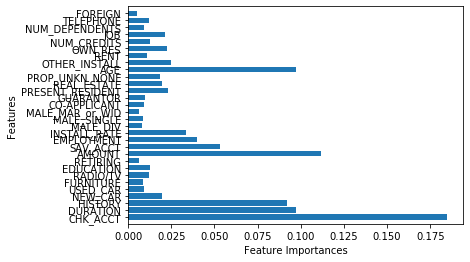

In [21]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(rnd_clf)

### 엑스트라 트리

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(
    n_estimators = 500, 
    max_leaf_nodes = 16, 
    max_features = 'auto', 
    n_jobs=-1
)

In [23]:
et_clf.fit(X_train, y_train) 
y_pred = et_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.716

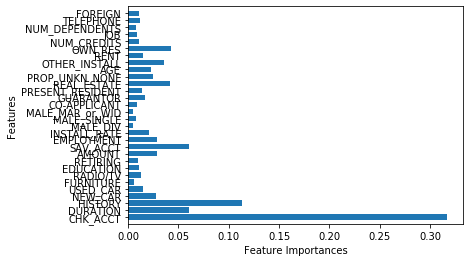

In [24]:
plot_feature_importances(et_clf)

### 수치 예측 (RandomForestRegressor, ExtraTreesRegressor)

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

movie = pd.read_csv('data/MoviePerformance.csv')
movie2 = movie[movie['ScreenFirst'] > 500]

X = movie2[['ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]
y = movie2['BoxOffice']

tree_rnd = RandomForestRegressor(
    n_estimators = 500, 
    max_leaf_nodes = 16, 
    max_features = 'auto',
    max_samples=0.5,    
    bootstrap = True,
    n_jobs=-1
)
tree_et = ExtraTreesRegressor(
    n_estimators = 500, 
    max_leaf_nodes = 16, 
    max_features = 'auto', 
    max_samples=0.5,    
    bootstrap = True,
    n_jobs=-1
)

scores_rnd = cross_val_score(tree_rnd, X, y, scoring='neg_mean_absolute_error', cv=5)
print(-scores_rnd.mean())
scores_et = cross_val_score(tree_et, X, y, scoring='neg_mean_absolute_error', cv=5)
print(-scores_et.mean())

40693819.552771494
38725325.849168204


### 부스팅 

### 에이다 부스팅

In [26]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( 
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=200, 
    algorithm="SAMME.R", 
    learning_rate=0.5 
)

ada_clf.fit(X_train, y_train) 
y_pred = ada_clf.predict(X_test) 
accuracy_score(y_test, y_pred)  

0.732

### 그래디언트 부스팅

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

movie = pd.read_csv('data/MoviePerformance.csv')
movie2 = movie[movie['ScreenFirst'] > 500]

X = movie2[['ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]
y = movie2['BoxOffice']

tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X, y3)

y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [28]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_pred, y))
rmse

37644355.902439155

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
y_gbrt_pred = gbrt.predict(X)
rmse = math.sqrt(mean_squared_error(y_gbrt_pred, y))
rmse

37644355.90243915

- 최적 n_estimators 값 찾기 

In [31]:
from sklearn.model_selection import train_test_split

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 300, learning_rate = 1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

gbrt.fit(X_train, y_train)

errors = [math.sqrt(mean_squared_error(y_val, y_pred)) for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors) + 1 

print(bst_n_estimators)

28


In [32]:
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = bst_n_estimators, learning_rate = 1.0)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_test)
score = math.sqrt(mean_squared_error(y_test, y_pred))
print(score)

34607661.31356247


### XGBoost

In [34]:
# 설치 필요
# Kernel died 발생 시 아래 코드 입력 (anaconda prompt)
# conda install -c conda-forge xgboost

import xgboost

xgb_reg = xgboost.XGBRegressor(max_depth=2, eta=1)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

xgb_reg.fit(X_train, y_train,
            eval_set=[(X_val, y_val)], early_stopping_rounds=2)

y_pred = xgb_reg.predict(X_test)
score = math.sqrt(mean_squared_error(y_test, y_pred))
print(score)

[15:47:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:47:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.24025e+08
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:1.16408e+08
[2]	validation_0-rmse:1.09171e+08
[3]	validation_0-rmse:1.03122e+08
[4]	validation_0-rmse:9.69088e+07
[5]	validation_0-rmse:9.09858e+07
[6]	validation_0-rmse:8.61577e+07
[7]	validation_0-rmse:8.22619e+07
[8]	validation_0-rmse:7.83668e+07
[9]	validation_0-rmse:7.54072e+07
[10]	validation_0-rmse:7.24722e+07
[11]	validation_0-rmse:7.03782e+07
[12]	validation_0-rmse:6.82719e+07
[13]	validation_0-rmse:6.66493e+07
[14]	validation_0-rmse:6.54317e+07
[15]	validation_0-rmse:6.39952e+07
[16]	validation_0-rmse:6.30759e+07
[17]	validation_0-rmse:6.19513e+07
[18]	validation_0-rmse:6.13638e+07
[19]	validation_0-rmse:6.03945e+07
[20]	validatio

/Users/fastbat/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


### 연습문제 

In [17]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

In [2]:
data = pd.read_csv("data/framingham_heart_disease.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Framingham Heart Study

- TenYearCHD: 목표변수 

- Male : 남성 여부 (범주형)
- Age: 나이
- Education: 교육수준 (범주형 1.0 고교 졸업 이하, 2.0 고졸, 3.0 전문대학 졸업, 4.0 대졸)
- currentSmoker: 흡연여부 (범주형)
- cigsPerDay: 흡연량
- BPMeds: 첫 검사시 혈압약 복용여부 (범주형)
- prevalentStroke: 이전 발작 경험 여부 (범주형)
- prevalentHyp: 고혈압 여부 (범주형)
- diabetes: 당뇨병 여부 (범주형)
- totChol: 총 콜레스테롤
- sysBP: 수축시 혈압
- diaBP: 이완시 혈압
- BMI: BMI 수치 값 ( 몸무게 / 키)
- heartrate: 심장 박동 수
- glucose: 혈당 수치
- TenYearCHD: 십년 후 심장관련 질환 발병 여부 


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.8 KB


- 범주형 변수들은 category 로 변환

In [6]:
for col in ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']:
    data[col] = data[col].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null category
age                4238 non-null int64
education          4133 non-null category
currentSmoker      4238 non-null category
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null category
prevalentStroke    4238 non-null category
prevalentHyp       4238 non-null category
diabetes           4238 non-null category
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null category
dtypes: category(8), float64(7), int64(1)
memory usage: 298.9 KB


- totChol, BPMeds, glucose 등의 변수들은 4238 행이 아니고 수가 적으므로 NA가 포함됨
- NA가 포함된 행은 삭제

In [8]:
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
male               3656 non-null category
age                3656 non-null int64
education          3656 non-null category
currentSmoker      3656 non-null category
cigsPerDay         3656 non-null float64
BPMeds             3656 non-null category
prevalentStroke    3656 non-null category
prevalentHyp       3656 non-null category
diabetes           3656 non-null category
totChol            3656 non-null float64
sysBP              3656 non-null float64
diaBP              3656 non-null float64
BMI                3656 non-null float64
heartRate          3656 non-null float64
glucose            3656 non-null float64
TenYearCHD         3656 non-null category
dtypes: category(8), float64(7), int64(1)
memory usage: 286.5 KB


In [10]:
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_numeric = X[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
X_cat = X.drop(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], axis=1)
X_s = pd.DataFrame(scaler.fit_transform(X_numeric))

In [54]:
X_s.head()

,0,1,2,3,4,5,6,7
0,0.184211,0.000000,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.368421,0.000000,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695
2,0.421053,0.285714,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.763158,0.428571,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.368421,0.328571,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119


In [55]:
X_s.columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

- X_s 와 X_cat 가 행의 수는 같지만 행번호가 상이함. 이 경우 pd.concat하면 두 데이터 프레임이 가로로 잘 합쳐지지 않음

In [56]:
X_s.tail()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
3651,0.684211,0.000000,0.151951,0.271868,0.349206,0.228308,0.363636,0.115819
3652,0.947368,0.000000,0.129363,0.399527,0.518519,0.184198,0.161616,0.110169
3653,0.473684,0.014286,0.410678,0.451537,0.465608,0.252787,0.222222,0.129944
3654,0.500000,0.614286,0.193018,0.203310,0.338624,0.101066,0.212121,0.079096
3655,0.526316,0.000000,0.320329,0.236407,0.370370,0.143723,0.363636,0.189266


In [57]:
X_cat.tail()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
4231,1,3.0,0,0.0,0,1,0
4232,1,1.0,0,0.0,0,1,0
4233,1,1.0,1,0.0,0,1,0
4234,1,3.0,1,0.0,0,0,0
4237,0,2.0,0,0.0,0,0,0


In [58]:
X_cat = X_cat.reset_index()

In [59]:
X_cat.tail()

,index,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
3651,4231,1,3.0,0,0.0,0,1,0
3652,4232,1,1.0,0,0.0,0,1,0
3653,4233,1,1.0,1,0.0,0,1,0
3654,4234,1,3.0,1,0.0,0,0,0
3655,4237,0,2.0,0,0.0,0,0,0


In [60]:
X_s_c = pd.concat([X_s, X_cat], axis=1)
X_s_c.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,index,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.184211,0.000000,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0,1,4.0,0,0.0,0,0,0
1,0.368421,0.000000,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,1,0,2.0,0,0.0,0,0,0
2,0.421053,0.285714,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,2,1,1.0,1,0.0,0,0,0
3,0.763158,0.428571,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,3,0,3.0,1,0.0,0,1,0
4,0.368421,0.328571,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,4,0,3.0,1,0.0,0,0,0


In [61]:
print(X_s.shape)
print(X_cat.shape)
print(X_s_c.shape)

(3656, 8)
(3656, 8)
(3656, 16)


- One Hot Encoding

In [62]:
X_ohe = pd.get_dummies(X_s_c)
X_ohe.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,index,male_0,...,currentSmoker_0,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,0.184211,0.000000,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0.368421,0.000000,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,1,1,...,1,0,1,0,1,0,1,0,1,0
2,0.421053,0.285714,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,2,0,...,0,1,1,0,1,0,1,0,1,0
3,0.763158,0.428571,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,3,1,...,0,1,1,0,1,0,0,1,1,0
4,0.368421,0.328571,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,4,1,...,0,1,1,0,1,0,1,0,1,0


- 직접 투표

In [67]:
log_clf = LogisticRegression(max_iter=100000) 
svm_clf = SVC()
nb_clf = GaussianNB()

voting_clf = VotingClassifier(
    estimators = [('log', log_clf), ('svm', svm_clf), ('nb', nb_clf)], voting='hard')

In [72]:
voting_score = cross_val_score(voting_clf, X_ohe, y, scoring='accuracy', cv=10)
voting_score.mean()

0.8490148963245752

In [73]:
voting_clf.fit(X_ohe, y)
y_pred = voting_clf.predict(X_ohe)

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[3091,    8],
       [ 532,   25]])

In [76]:
y.value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

- 간접 투표

In [77]:
log_clf = LogisticRegression(max_iter=100000) 
svm_clf = SVC(probability=True) 
nb_clf = GaussianNB()

In [78]:
soft_clf = VotingClassifier(
    estimators = [('log', log_clf), ('svm', svm_clf), ('nb', nb_clf)], voting='soft')

In [79]:
soft_score = cross_val_score(soft_clf, X_ohe, y, scoring='accuracy', cv=10)
soft_score.mean()

0.8399865259375702

- 배깅 

In [80]:
from sklearn.ensemble import BaggingClassifier

In [81]:
bag_clf = BaggingClassifier(
    LogisticRegression(max_iter=100000), 
    n_estimators = 500, 
    max_samples = 100, 
    bootstrap = True, 
    n_jobs = -1
)

In [82]:
bag_score = cross_val_score(bag_clf, X_ohe, y, scoring='accuracy', cv=10)
bag_score.mean()

0.8479220001497119

- 랜덤 포레스트 

In [83]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators = 500,  
    max_features = 'auto', 
    max_samples=0.5,    
    bootstrap = True,
    n_jobs=-1
)

In [84]:
rnd_score = cross_val_score(rnd_clf, X_ohe, y, scoring='accuracy', cv=10)
rnd_score.mean()

0.812388651845198

- 에이다 부스트 

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier( 
    DecisionTreeClassifier(max_depth=3), 
    n_estimators=500, 
    algorithm="SAMME.R", 
    learning_rate=0.5 
)

In [87]:
ada_score = cross_val_score(ada_clf, X_ohe, y, scoring='accuracy', cv=10)
ada_score.mean()

0.7000022456770716

- 그래디언트 부스트 

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_clf = GradientBoostingClassifier(
    max_depth = 2, 
    n_estimators = 500, 
    learning_rate = 0.5)

In [90]:
gbrt_score = cross_val_score(gbrt_clf, X_ohe, y, scoring='accuracy', cv=10)
gbrt_score.mean()

0.6742952316790178

- XGBoost

In [94]:
import xgboost

xgb_clf = xgboost.XGBClassifier(
    n_estimators = 500,
    max_depth = 3, 
    eta = 1,
    subsample = 0.5,
    n_jobs = -1
)

xgb_score = cross_val_score(xgb_clf, X_ohe, y, scoring='accuracy', cv=10)
xgb_score.mean()

0.7864099109214763